In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
def data_prepare(csv_data):
    target_data = np.array(csv_data['emotion'], dtype = np.int32)
    pixel_values = csv_data['pixels']
    faces = []
    for values in pixel_values:
        face = [int(pixel) for pixel in values.split(" ")]
        face = np.array(face, dtype = np.uint8).reshape(48, 48)
        faces.append(face)
    print(len(faces))
    faces = np.array(faces, dtype = np.float32)
    target_data = to_categorical(target_data)
    return faces, target_data

In [4]:
train_data = pd.read_csv(r"C:\Users\asus\Documents\Classroom\New folder\all (1)\fer2013\fer2013\fer2013.csv")

x_train, y_train = data_prepare(train_data)
x_train.shape, y_train.shape

35887


((35887, 48, 48), (35887, 7))

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
import pickle

with open('faces_train.pkl', 'wb') as f:
    pickle.dump(x_train, f)

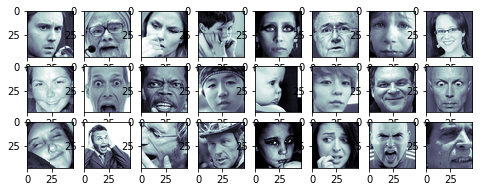

In [7]:
fig = plt.figure(figsize = (8,8), edgecolor='w')
for i in range(24):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_train[i], cmap = plt.cm.bone)
plt.show()

In [9]:
Scale = MinMaxScaler(feature_range = (-1, 1))
data = x_train.reshape(-1, 2304)
data = Scale.fit_transform(data)
x_train = data.reshape(-1, 48, 48, 1)

In [12]:
import cv2

cv2.imshow("", x_train[0])
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [10]:
Data_generator = ImageDataGenerator(featurewise_center=False,
                                    featurewise_std_normalization=False,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True)

In [11]:
def Model():
    model = Sequential()
    
    #First Conv2D Layer
    model.add(Conv2D(32, (5, 5), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size =(2, 2)))
    
    #Second Conv2D Layer
    model.add(Conv2D(64, (5, 5), activation = 'relu', padding = 'same'))
    model.add(Conv2D(64, (5, 5), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    #Third Conv2D Layer
    model.add(Conv2D(128, (5, 5), activation = 'relu', padding = 'same'))
    model.add(Conv2D(128, (5, 5), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(7, activation = 'softmax'))
    
    return model

In [12]:
model = Model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [13]:
training_data = x_train
training_target = y_train
x_train, x_test, y_train, y_test = train_test_split(training_data, training_target, random_state = 1)

In [14]:
batch_size = 32
epochs = 10
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer= Adam())

In [15]:
model.fit_generator(Data_generator.flow(x_train, y_train, batch_size = batch_size), steps_per_epoch=len(x_train)/batch_size, epochs= epochs)

Epoch 1/10
842/841 [==============================] - 88s 104ms/step - loss: 1.9565 - acc: 0.2540
Epoch 2/10
842/841 [==============================] - 75s 89ms/step - loss: 1.6114 - acc: 0.3638
Epoch 3/10
842/841 [==============================] - 75s 89ms/step - loss: 1.4759 - acc: 0.4255
Epoch 4/10
842/841 [==============================] - 75s 89ms/step - loss: 1.3659 - acc: 0.4737
Epoch 5/10
842/841 [==============================] - 75s 89ms/step - loss: 1.3026 - acc: 0.5050
Epoch 6/10
842/841 [==============================] - 75s 89ms/step - loss: 1.2568 - acc: 0.5207
Epoch 7/10
842/841 [==============================] - 75s 89ms/step - loss: 1.2169 - acc: 0.5435
Epoch 8/10
842/841 [==============================] - 75s 89ms/step - loss: 1.1866 - acc: 0.5531
Epoch 9/10
842/841 [==============================] - 75s 89ms/step - loss: 1.1577 - acc: 0.5645
Epoch 10/10
842/841 [==============================] - 75s 89ms/step - loss: 1.1300 - acc: 0.5732


In [16]:
test_score = model.evaluate(x_test, y_test, verbose = 1)

8972/8972 [==============================] - 7s 804us/step


In [17]:
test_score

[1.1017538300859466, 0.579803834150691]

In [18]:
from keras.models import model_from_json

In [19]:
model_json = model.to_json()
with open ('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [20]:
predictions = model.predict(x_test)

In [28]:
predict_labels = [np.argmax(p) for p in predictions]
y_test_labels = [np.argmax(p) for p in y_test]

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_labels, predict_labels)

0.579803834150691

In [34]:
import cv2

In [39]:
emotions = ['angry', 'disgust', 'scared', 'happy', 'sad', 'surprised', 'neutral']

In [36]:
image = x_test[0]
cv2.imshow("", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
emotions[y_test_labels[0]]

'angry'